In [575]:
#tous les imports nécessaires
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.symmetry.analyzer import SpacegroupOperations
from pymatgen.core.operations import SymmOp
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view

In [576]:
#téléchargement de ma structure
with MPRester("AzOW60LLLKSgtVAVUq4") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-961678")
    
struct = SpacegroupAnalyzer(structure)
struct_conv = struct.get_conventional_standard_structure()
symmetrized_struct = struct.get_symmetrized_structure() # symetrique 

#récupération de la structure conventionnel qui correspond à la maille du fichier CIF symmetrized
struct_analyze = SpacegroupAnalyzer(struct_conv)

# récupération des opérations de symmétrie
sym_op = struct_analyze.get_symmetry_operations()



view = quick_view(struct_conv)
display(view)
view.script('draw symop 1 {atomno = 1}; select atomno=1; label on; color red')

JsmolView(layout=Layout(align_self='stretch', height='400px'))

# Position des atomes choisis dans le cristal

In [577]:
summary=struct.get_primitive_standard_structure()

Sc = [0, 0, 0]
Co = [0.2500, 0.2500, 0.7500]
Te = [0.0000, 0.0000, 0.5000]
print(summary.sites)


[PeriodicSite: Sc (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000], PeriodicSite: Co (1.5197, 1.5197, 1.5197) [0.2500, 0.2500, 0.2500], PeriodicSite: Te (3.0394, 3.0394, 3.0394) [0.5000, 0.5000, 0.5000]]


# Premier élément de symétrie

Le premier élément de symétrie que j'ai choisi est une roto-inversion d'ordre 4 sur l'atome de Co1 situé en (0.25,0.25,0.75). Il s'agit d'une rotation d'ordre 4 suivie d'une inversion. La matrice de cette opération est telle que :  
%%latex
Equation matricielle

\begin{equation}
\begin{pmatrix}0 & 1 & 0\\-1 & 0 & 0\\0 & 0 & -1\end{pmatrix}\begin{pmatrix}x\\y\\z\end{pmatrix}=\begin{pmatrix}y\\-x\\-z\end{pmatrix}
\end{equation}

Ce qui donne avec $(x,y,z) = (0.25,0.25,0.75)$ :

\begin{equation}
\begin{pmatrix}0 & 1 & 0\\-1 & 0 & 0\\0 & 0 & -1\end{pmatrix}\begin{pmatrix}x\\y\\z\end{pmatrix}=\begin{pmatrix}0.25\\-0.25\\-0.75\end{pmatrix}
\end{equation}


Il s'agit d'une opération de deuxième espèce.

Matrice de roto-inversion :
 [[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0. -1.]]
 
Position initial de l'atome de Cobalt : [0.25, 0.25, 0.75]
Position de l'atome de Cobalt après l'inversion: [ 0.25 -0.25 -0.75]


JsmolView(layout=Layout(align_self='stretch', height='400px'))

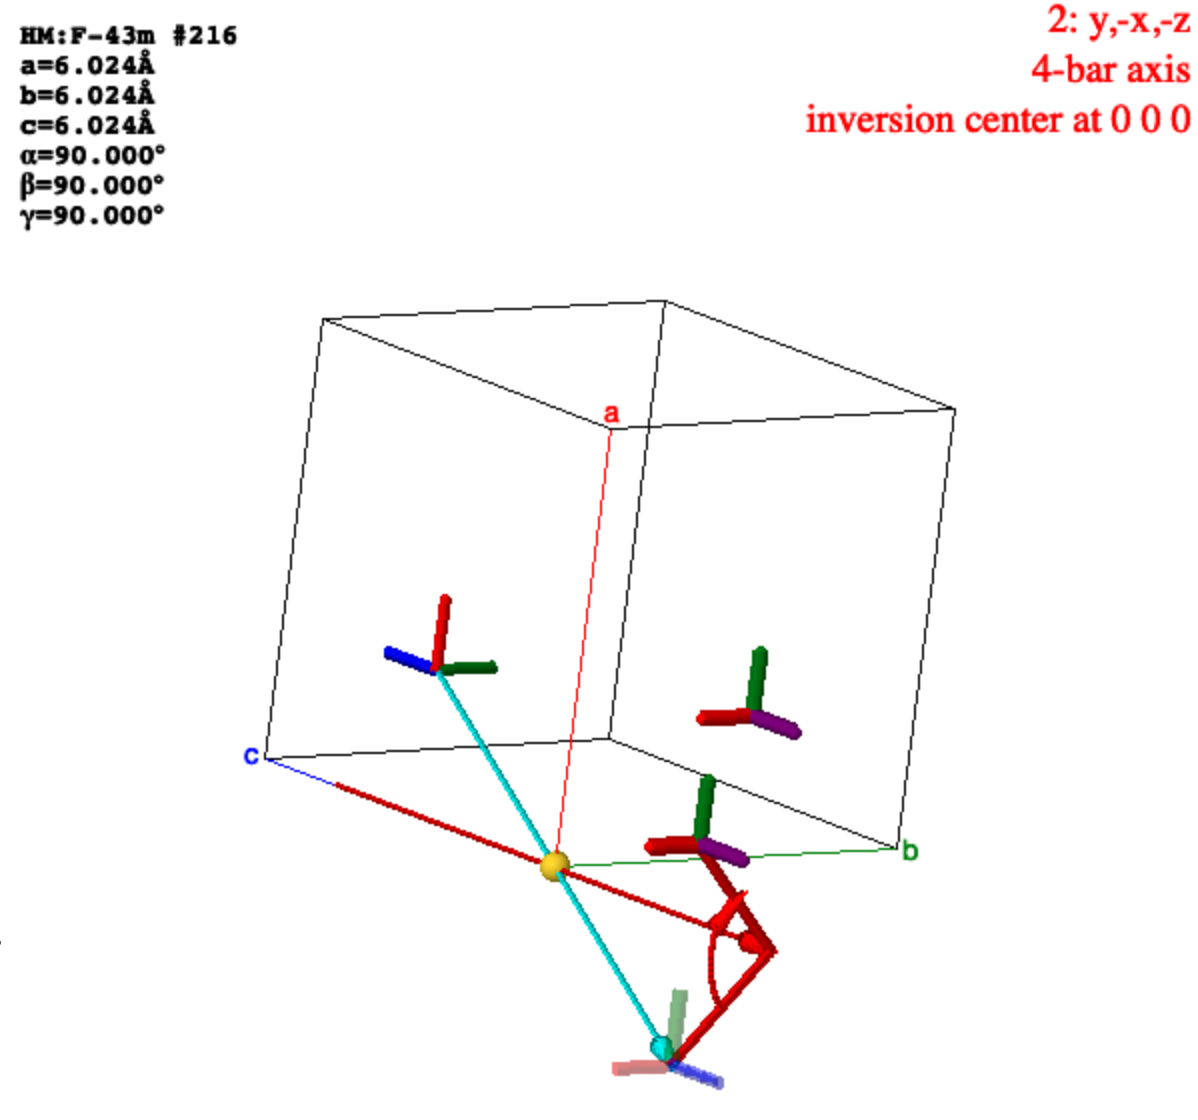

In [578]:
s1 = SymmOp.from_xyz_string('y,-x,-z')
op1 = s1.operate(Co)
rot1 = s1.rotation_matrix
print("Matrice de roto-inversion :\n",rot1)
print(" ")
print("Position initial de l'atome de Cobalt :",Co)
print("Position de l'atome de Cobalt après l'inversion:",op1)

#Affiche du cristal
view = quick_view(struct_conv)
display(view)
view.script('draw symop 2 {atomno = 2}; select atomno=2; label on; color red')

Image("4baraxis.png")

# Deuxième élément de symétrie
Le deuxième élément de symétrie est une rotation d'ordre 3 sur l'atome de Te2 situé en (0.0000, 0.0000, 0.5000). L'opérateur de rotation est un opérateur de première espèce qui conserve la chiralité. La matrice de cette opération est telle que :

\begin{equation}
\begin{pmatrix}0 & -1 & 0\\0 & 0 & 1\\-1 & 0 & 0\end{pmatrix}\begin{pmatrix}x\\y\\z\end{pmatrix}=\begin{pmatrix}-y\\z\\-x\end{pmatrix}
\end{equation}

Ce qui donne avec $(x,y,z) = (0.0000, 0.0000, 0.5000)$ :

\begin{equation}
\begin{pmatrix}0 & -1 & 0\\0 & 0 & 1\\-1 & 0 & 0\end{pmatrix}\begin{pmatrix}x\\y\\z\end{pmatrix}=\begin{pmatrix}0\\0.5\\0\end{pmatrix}
\end{equation}

On voit que le déterminant de cette matrice vaut 1, il s'agit bien d'une rotation.


Matrice de rotation :
 [[ 0. -1.  0.]
 [ 0.  0.  1.]
 [-1.  0.  0.]]
 
Position initial de l'atome de Tellure : [0.0, 0.0, 0.5]
Position de l'atome de Tellure après l'inversion: [0.  0.5 0. ]


JsmolView(layout=Layout(align_self='stretch', height='400px'))

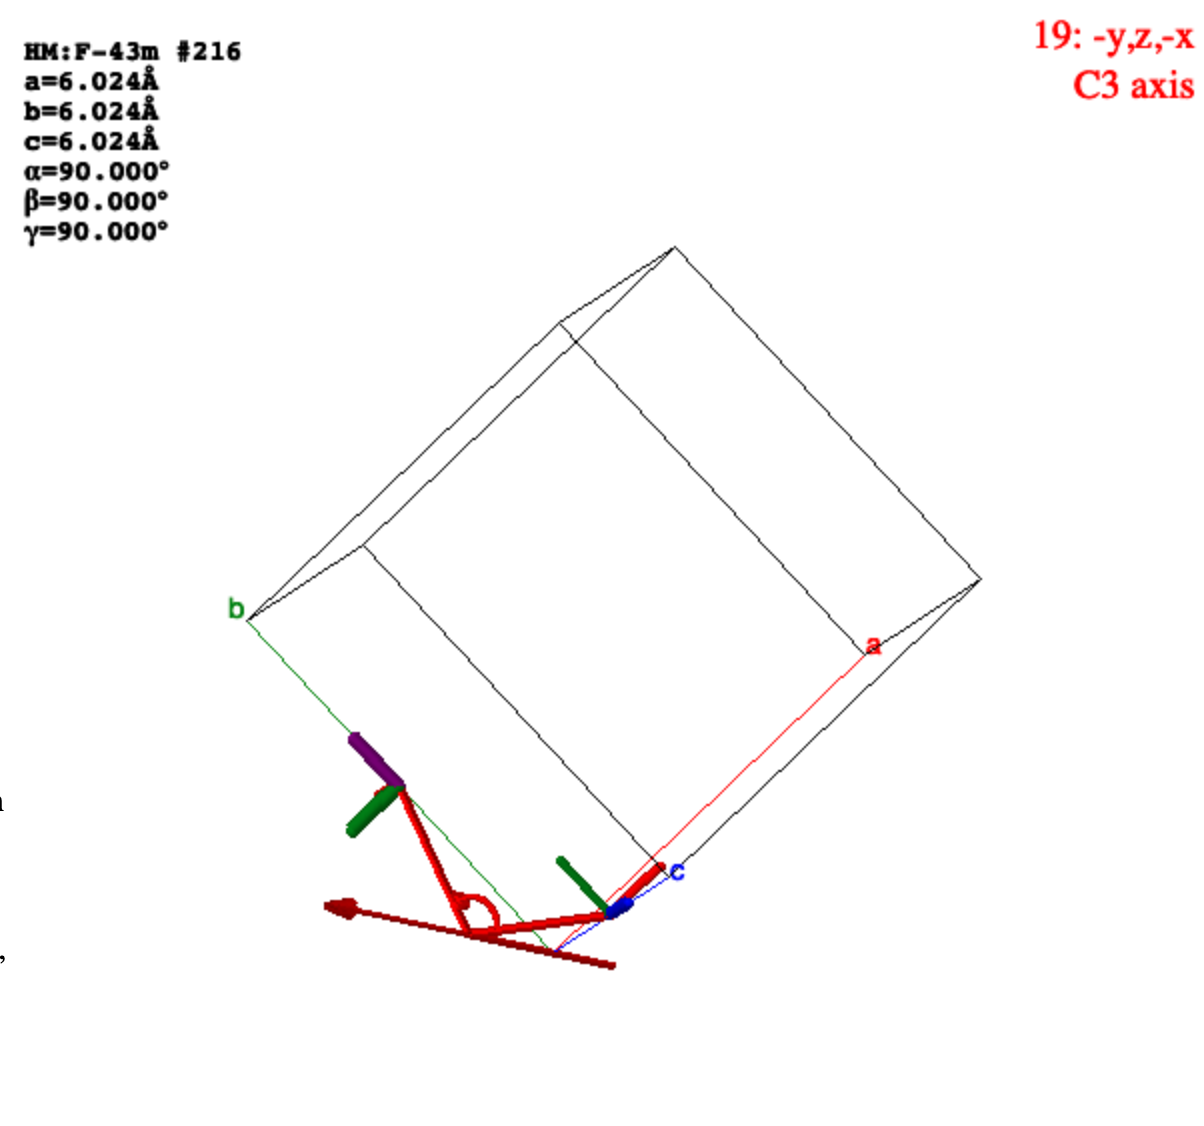

In [579]:
s2 = SymmOp.from_xyz_string('-y,z,-x')
op2 = s2.operate(Te)
rot2 = s2.rotation_matrix
print("Matrice de rotation :\n",rot2)
print(" ")
print("Position initial de l'atome de Tellure :",Te)
print("Position de l'atome de Tellure après l'inversion:",op2)

#Affiche du cristal
view = quick_view(struct_conv)
display(view)
view.script('draw symop 19 {atomno = 3}; select atomno=3; label on; color red')

Image("C3axis.png")

# Troisième élément de symétrie 
Le troisième élément de symétrie est une réflexion par rapport à un plan miroir sur l'atome de Sc0 situé en (0, 0, 0). L'opérateur de réflexion est un opérateur de deuxième espèce qui inverse la chiralité. La matrice de cette opération est telle que :

\begin{equation}
\begin{pmatrix}0 & -1 & 0\\-1 & 0 & 0\\0 & 0 & 1\end{pmatrix}\begin{pmatrix}x\\y\\z\end{pmatrix}=\begin{pmatrix}-y+1/2\\-x+1/2\\z\end{pmatrix}
\end{equation}

Ce qui donne avec $(x,y,z) = (0,0,0)$ :

\begin{equation}
\begin{pmatrix}0 & -1 & 0\\-1 & 0 & 0\\0 & 0 & 1\end{pmatrix}\begin{pmatrix}x\\y\\z\end{pmatrix}=\begin{pmatrix}0.5\\0.5\\0\end{pmatrix}
\end{equation}


On voit que le déterminant de cette matrice vaut -1, il s'agit bien d'une réflexion.

Matrice de rotation :
 [[ 0. -1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]
 
Position initial de l'atome de Scandium : [0, 0, 0]
Position de l'atome de Scandium après l'inversion: [0.5 0.5 0. ]


JsmolView(layout=Layout(align_self='stretch', height='400px'))

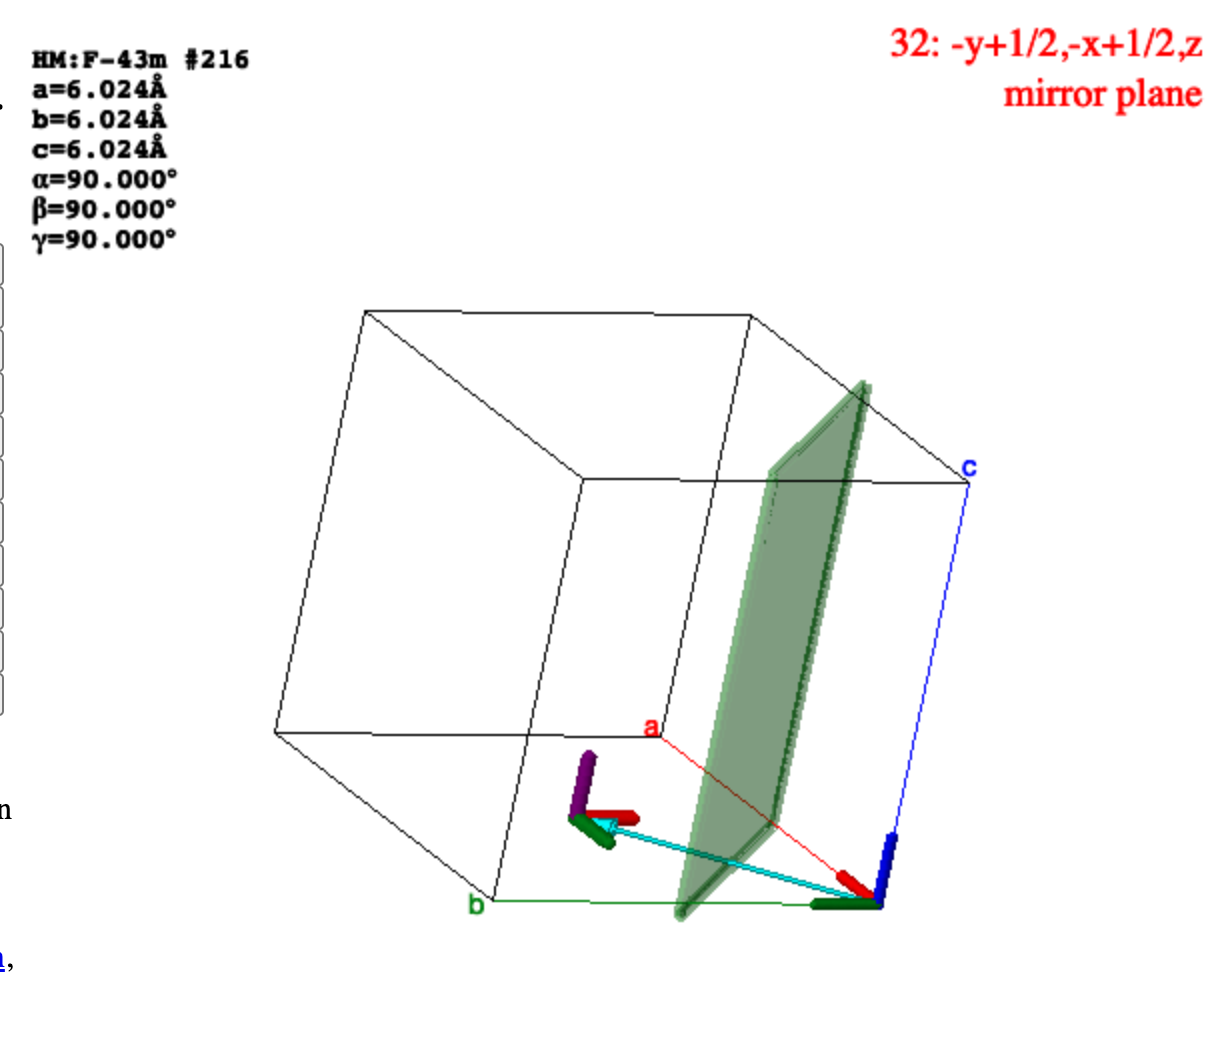

In [580]:
s3 = SymmOp.from_xyz_string('-y+1/2,-x+1/2,z')
op3 = s3.operate(Sc)
rot3 = s3.rotation_matrix
print("Matrice de rotation :\n",rot3)
print(" ")
print("Position initial de l'atome de Scandium :",Sc)
print("Position de l'atome de Scandium après l'inversion:",op3)

#Affiche du cristal
view = quick_view(struct_conv)
display(view)
view.script('draw symop 32 {atomno = 1}; select atomno=1; label on; color red')

Image("Mirror.png")

# Références

Images : https://www.pslc.ws/jsmol/jcse/explore.htm.